# Supervised Learning Project: INN Hotels

## Problem Statement

- Context

A significant number of hotel bookings are called off due to cancellations or no-shows. The typical reasons for cancellations include change of plans, scheduling conflicts, etc. This is often made easier by the option to do so free of charge or preferably at a low cost which is beneficial to hotel guests but it is a less desirable and possibly revenue-diminishing factor for hotels to deal with. Such losses are particularly high on last-minute cancellations.

The new technologies involving online booking channels have dramatically changed customers’ booking possibilities and behavior. This adds a further dimension to the challenge of how hotels handle cancellations, which are no longer limited to traditional booking and guest characteristics.

The cancellation of bookings impacts a hotel on various fronts:
1. Loss of resources (revenue) when the hotel cannot resell the room.
2. Additional costs of distribution channels by increasing commissions or paying for publicity to help sell these rooms.
3. Lowering prices last minute, so the hotel can resell a room, resulting in reducing the profit margin.
4. Human resources to make arrangements for the guests.

- Objective

The increasing number of cancellations calls for a Machine Learning based solution that can help in predicting which booking is likely to be canceled. INN Hotels Group has a chain of hotels in Portugal, they are facing problems with the high number of booking cancellations and have reached out to your firm for data-driven solutions. You as a data scientist have to analyze the data provided to find which factors have a high influence on booking cancellations, build a predictive model that can predict which booking is going to be canceled in advance, and help in formulating profitable policies for cancellations and refunds.

### Let us start by importing the required libraries

In [5]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import warnings
warnings.filterwarnings('ignore')

### Load the dataset

In [8]:
df = pd.read_csv('INNHotelsGroup.csv')

In [10]:
#seeing few sample records from the dataset
df.sample(5)

,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
24162,INN24163,2,0,0,1,Not Selected,0,Room_Type 1,2,2018,5,19,Online,0,0,0,0.00,2,Not_Canceled
11015,INN11016,1,0,1,2,Meal Plan 1,0,Room_Type 1,219,2017,9,4,Offline,0,0,0,76.67,0,Not_Canceled
19365,INN19366,2,0,0,1,Meal Plan 1,0,Room_Type 1,113,2017,8,22,Online,0,0,0,76.50,2,Canceled
10477,INN10478,1,0,0,1,Meal Plan 1,0,Room_Type 1,5,2017,8,19,Complementary,0,0,0,0.00,0,Not_Canceled
19526,INN19527,2,0,0,2,Meal Plan 1,0,Room_Type 4,28,2017,10,27,Online,0,0,0,136.00,1,Not_Canceled


### Exploratory Data Analysis

In [13]:
#get the information about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36275 entries, 0 to 36274
Data columns (total 19 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Booking_ID                            36275 non-null  object 
 1   no_of_adults                          36275 non-null  int64  
 2   no_of_children                        36275 non-null  int64  
 3   no_of_weekend_nights                  36275 non-null  int64  
 4   no_of_week_nights                     36275 non-null  int64  
 5   type_of_meal_plan                     36275 non-null  object 
 6   required_car_parking_space            36275 non-null  int64  
 7   room_type_reserved                    36275 non-null  object 
 8   lead_time                             36275 non-null  int64  
 9   arrival_year                          36275 non-null  int64  
 10  arrival_month                         36275 non-null  int64  
 11  arrival_date   

- Observations:
   - It can be observed that there are 36275 rows and 19 columns in the dataset.
   - dtypes: float64(1), int64(13), object(5)

In [16]:
#check if there are any null values in any of the columns
df.isnull().sum()

Booking_ID                              0
no_of_adults                            0
no_of_children                          0
no_of_weekend_nights                    0
no_of_week_nights                       0
type_of_meal_plan                       0
required_car_parking_space              0
room_type_reserved                      0
lead_time                               0
arrival_year                            0
arrival_month                           0
arrival_date                            0
market_segment_type                     0
repeated_guest                          0
no_of_previous_cancellations            0
no_of_previous_bookings_not_canceled    0
avg_price_per_room                      0
no_of_special_requests                  0
booking_status                          0
dtype: int64

- Observations:
     - There are no null values or missing values in any of the columns.

In [18]:
#getting an overview of distribution of all variables
df.describe().T

,count,mean,std,min,25%,50%,75%,max
no_of_adults,36275.0,1.844962,0.518715,0.0,2.0,2.00,2.0,4.0
no_of_children,36275.0,0.105279,0.402648,0.0,0.0,0.00,0.0,10.0
no_of_weekend_nights,36275.0,0.810724,0.870644,0.0,0.0,1.00,2.0,7.0
no_of_week_nights,36275.0,2.204300,1.410905,0.0,1.0,2.00,3.0,17.0
required_car_parking_space,36275.0,0.030986,0.173281,0.0,0.0,0.00,0.0,1.0
lead_time,36275.0,85.232557,85.930817,0.0,17.0,57.00,126.0,443.0
arrival_year,36275.0,2017.820427,0.383836,2017.0,2018.0,2018.00,2018.0,2018.0
arrival_month,36275.0,7.423653,3.069894,1.0,5.0,8.00,10.0,12.0
arrival_date,36275.0,15.596995,8.740447,1.0,8.0,16.00,23.0,31.0
repeated_guest,36275.0,0.025637,0.158053,0.0,0.0,0.00,0.0,1.0


In [20]:
df['Booking_ID'].value_counts()

Booking_ID
INN00001    1
INN24187    1
INN24181    1
INN24182    1
INN24183    1
           ..
INN12086    1
INN12085    1
INN12084    1
INN12083    1
INN36275    1
Name: count, Length: 36275, dtype: int64

- Observations:
  - All values are unique in booking ID so we can remove this column.

In [22]:
#dropping Booking_ID
df.drop(columns = ['Booking_ID'],axis = 1, inplace = True)

In [24]:
df.sample(5)

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
33567,2,1,2,5,Meal Plan 1,0,Room_Type 1,75,2018,7,23,Online,0,0,0,123.30,0,Canceled
5539,2,0,0,3,Meal Plan 1,0,Room_Type 1,183,2018,9,8,Online,0,0,0,110.00,1,Canceled
2379,2,0,2,5,Meal Plan 1,0,Room_Type 4,213,2018,8,13,Online,0,0,0,109.66,0,Canceled
15867,2,2,0,1,Meal Plan 1,0,Room_Type 7,116,2018,8,12,Online,0,0,0,202.74,1,Canceled
17098,1,0,0,3,Meal Plan 1,0,Room_Type 1,37,2018,10,13,Offline,0,0,0,95.00,0,Not_Canceled


#### Univariate Analysis

- Perform univariate analysis on numerical variables

In [26]:
# though many columns are numeric, most represent categories like no. of children,adults etc. So here we are analysing variables which truly are numeric in nature.
numerical_cols = [
    'lead_time',
    'avg_price_per_room',
    'no_of_previous_cancellations',
    'no_of_previous_bookings_not_canceled'
]

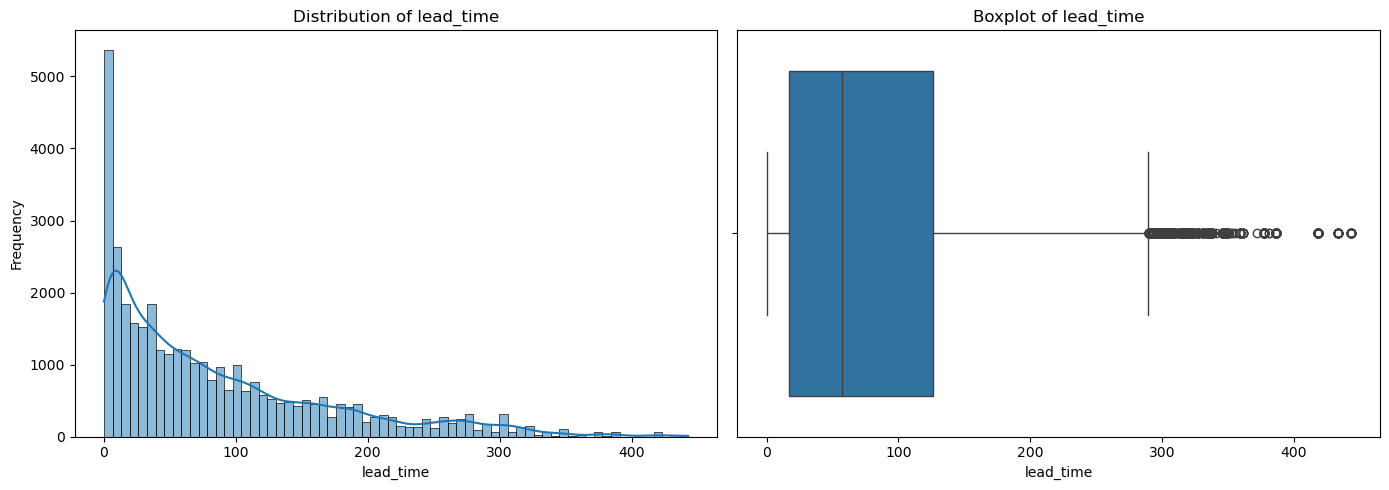

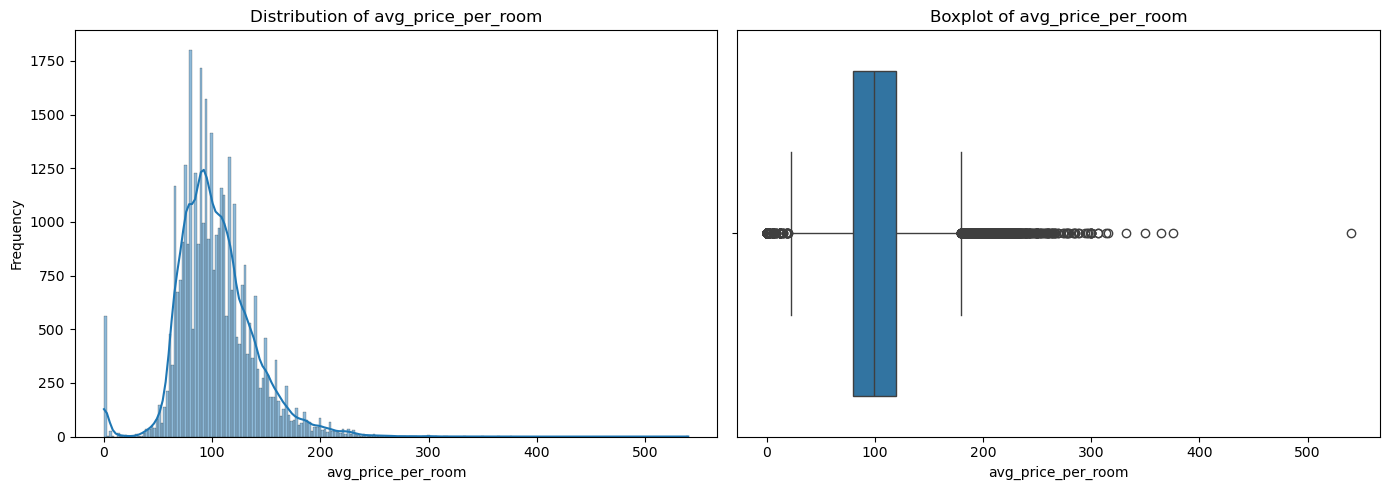

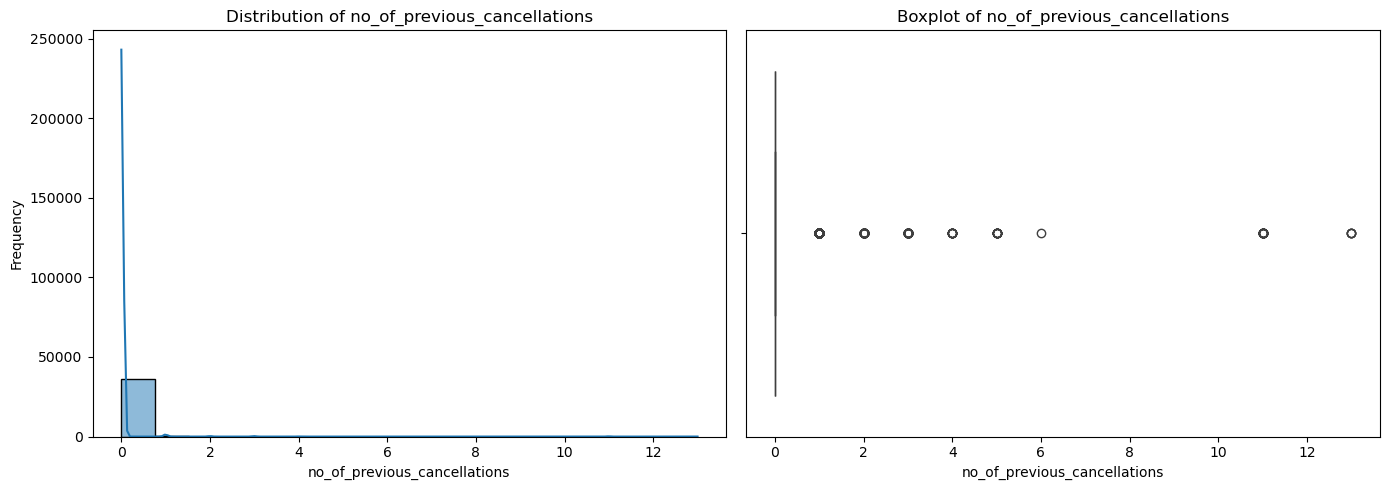

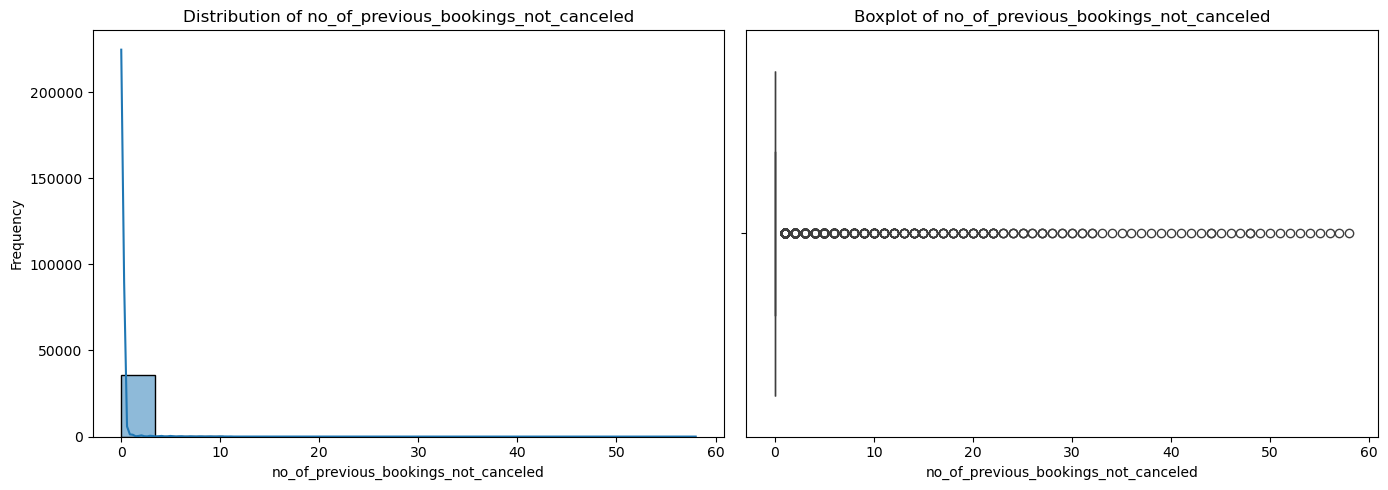

In [28]:

# Loop through each numeric column and plot both a histogram and boxplot
for column in numerical_cols:
    fig, axes = plt.subplots(1, 2, figsize=(14, 5))
    
    # Histogram
    sns.histplot(df[column], kde=True, ax=axes[0])
    axes[0].set_title(f'Distribution of {column}')
    axes[0].set_xlabel(column)
    axes[0].set_ylabel('Frequency')
    
    # Boxplot
    sns.boxplot(x=df[column], ax=axes[1])
    axes[1].set_title(f'Boxplot of {column}')
    axes[1].set_xlabel(column)
    
    plt.tight_layout()
    plt.show()

- Observations:
    * From the lead time analysis, it can be observed that the distribution is right skewed and 50% of the bookings are done around 50 days before the arrival date. And 75% bookings are done before 120 days or 4 months of arrival. 
    * The interquartile range of avg_proce_room suggests that most rooms are priced between 80.3 and 120 units, with the median of around 100.
    * The distribution of 'no.of_previous_cancellations' indicates low rate of previous cancellations which might indicate guests have a strong commitment to their bookings, or it may suggest that guests who frequently cancel are not well represented in this dataset.
    * The distribution of 'no.of_previous_bookings_not_cancelled' indicates that over half of the guests are first-time visitors or have no history of non-canceled bookings, indicating that the dataset may include many new or one-time customers.

In [30]:
#Creating a list of all columns
col = list(df.columns)
#Exploring the unique values in each column and their frequency
for i in col:
    print(df[i].value_counts())
    print('-'*50)

no_of_adults
2    26108
1     7695
3     2317
0      139
4       16
Name: count, dtype: int64
--------------------------------------------------
no_of_children
0     33577
1      1618
2      1058
3        19
9         2
10        1
Name: count, dtype: int64
--------------------------------------------------
no_of_weekend_nights
0    16872
1     9995
2     9071
3      153
4      129
5       34
6       20
7        1
Name: count, dtype: int64
--------------------------------------------------
no_of_week_nights
2     11444
1      9488
3      7839
4      2990
0      2387
5      1614
6       189
7       113
10       62
8        62
9        34
11       17
15       10
12        9
14        7
13        5
17        3
16        2
Name: count, dtype: int64
--------------------------------------------------
type_of_meal_plan
Meal Plan 1     27835
Not Selected     5130
Meal Plan 2      3305
Meal Plan 3         5
Name: count, dtype: int64
--------------------------------------------------
required_ca

- Perform univariate analysis on Categorical Variables.

In [32]:
categorical_cols = [
    'no_of_adults',
    'no_of_children',
    'no_of_weekend_nights',
    'no_of_week_nights',
    'required_car_parking_space',
    'repeated_guest',
    'no_of_special_requests',
    'arrival_year',
    'arrival_month',
    'type_of_meal_plan',
    'room_type_reserved',
    'market_segment_type',
    'booking_status'
]

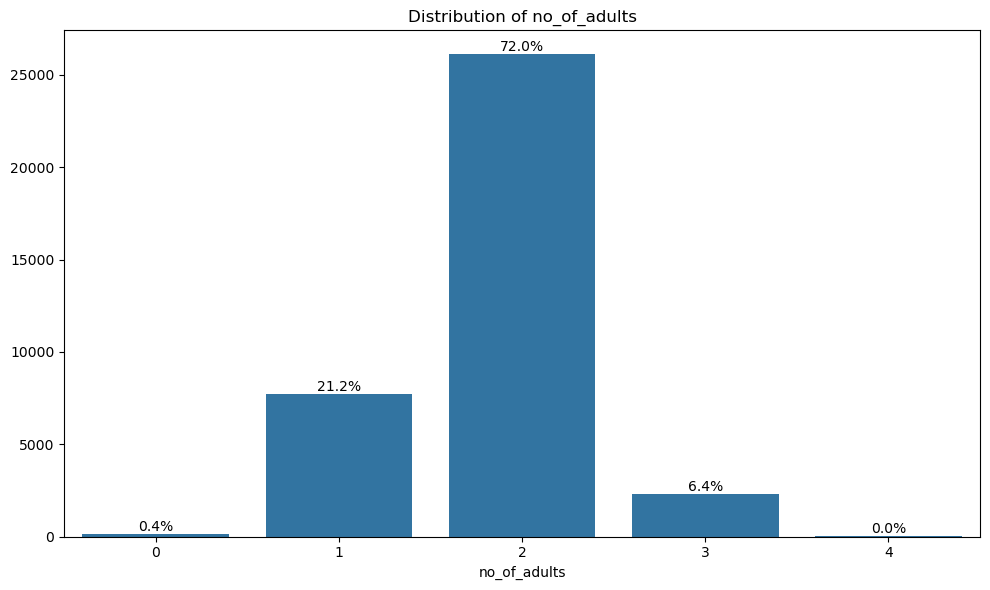


Value Counts and Percentages for no_of_adults:
 Value  Count  Percentage
     0    139    0.383184
     1   7695   21.212957
     2  26108   71.972433
     3   2317    6.387319
     4     16    0.044108
--------------------------------------------------


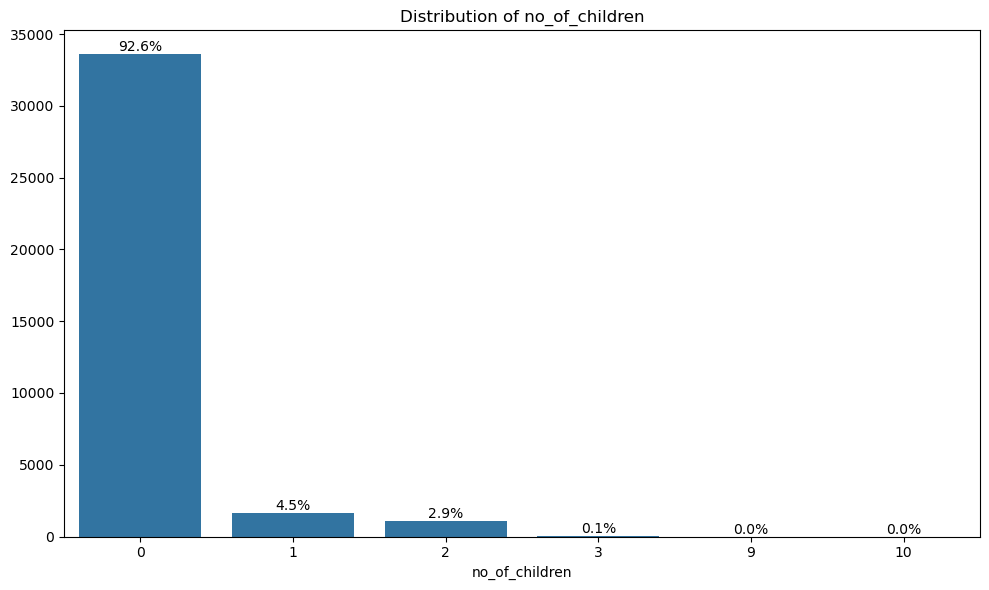


Value Counts and Percentages for no_of_children:
 Value  Count  Percentage
     0  33577   92.562371
     1   1618    4.460372
     2   1058    2.916609
     3     19    0.052378
     9      2    0.005513
    10      1    0.002757
--------------------------------------------------


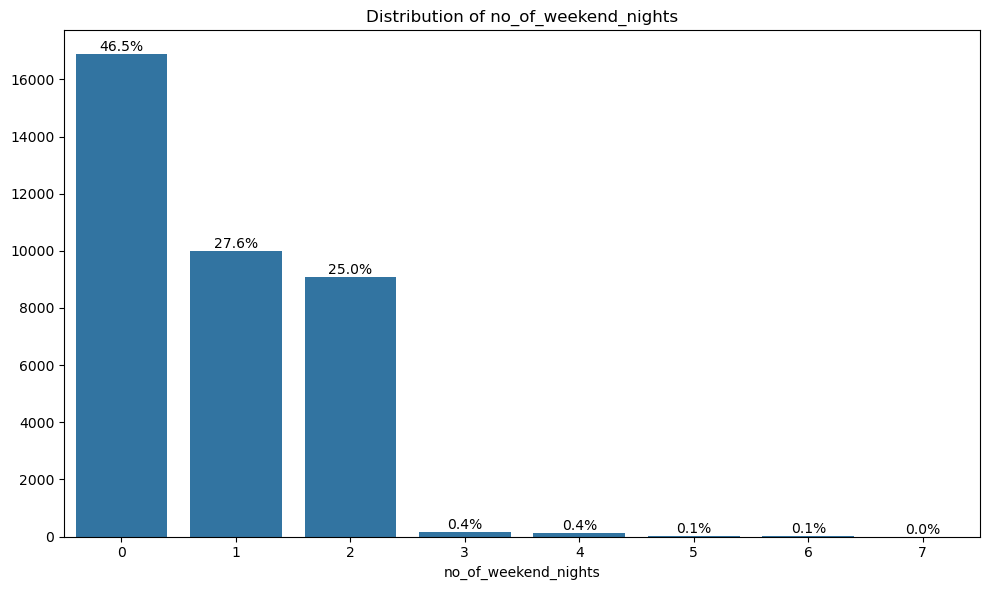


Value Counts and Percentages for no_of_weekend_nights:
 Value  Count  Percentage
     0  16872   46.511371
     1   9995   27.553411
     2   9071   25.006203
     3    153    0.421778
     4    129    0.355617
     5     34    0.093728
     6     20    0.055134
     7      1    0.002757
--------------------------------------------------


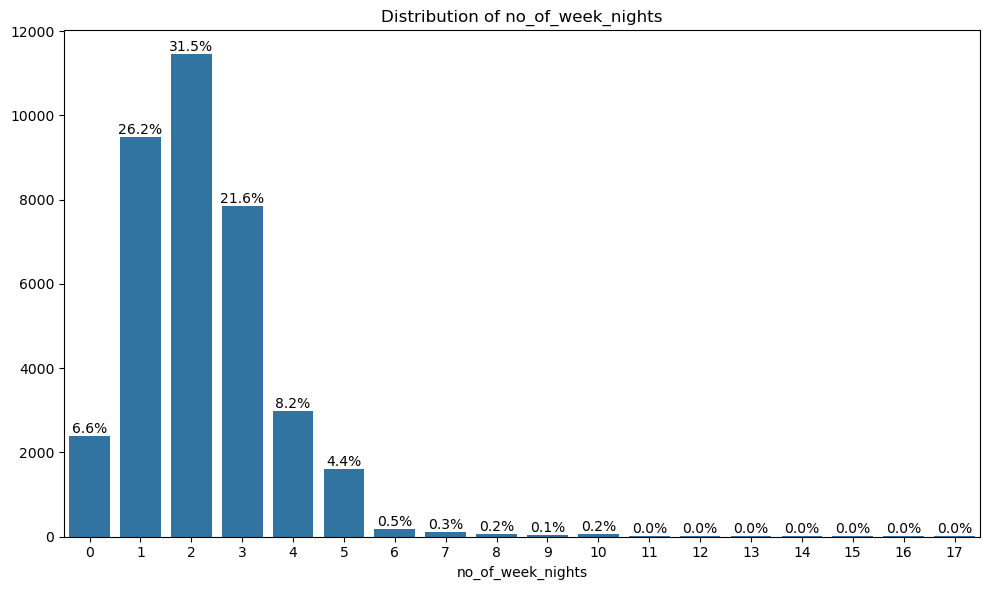


Value Counts and Percentages for no_of_week_nights:
 Value  Count  Percentage
     0   2387    6.580289
     1   9488   26.155755
     2  11444   31.547898
     3   7839   21.609924
     4   2990    8.242591
     5   1614    4.449345
     6    189    0.521020
     7    113    0.311509
     8     62    0.170917
     9     34    0.093728
    10     62    0.170917
    11     17    0.046864
    12      9    0.024810
    13      5    0.013784
    14      7    0.019297
    15     10    0.027567
    16      2    0.005513
    17      3    0.008270
--------------------------------------------------


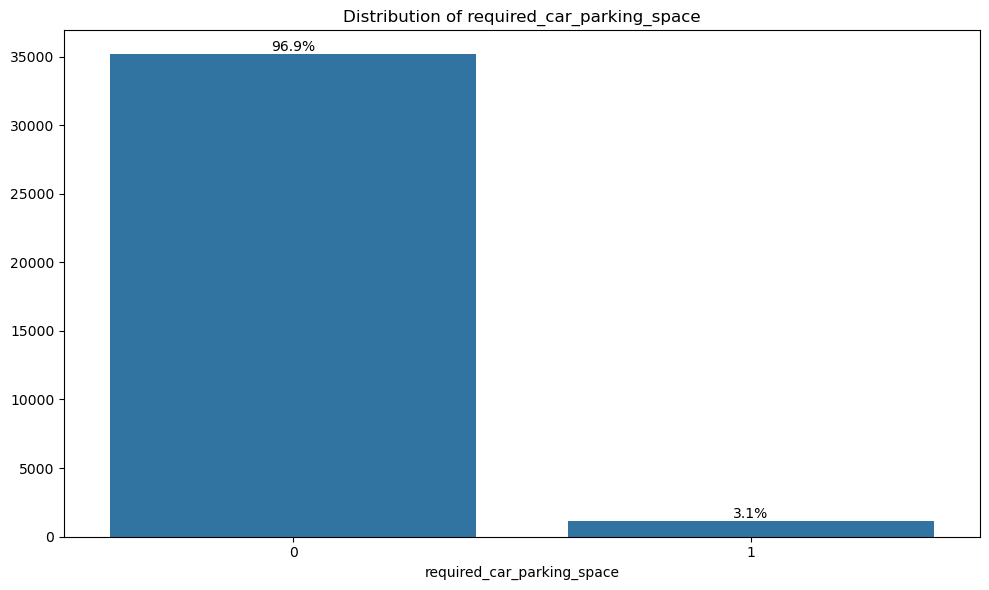


Value Counts and Percentages for required_car_parking_space:
 Value  Count  Percentage
     0  35151   96.901447
     1   1124    3.098553
--------------------------------------------------


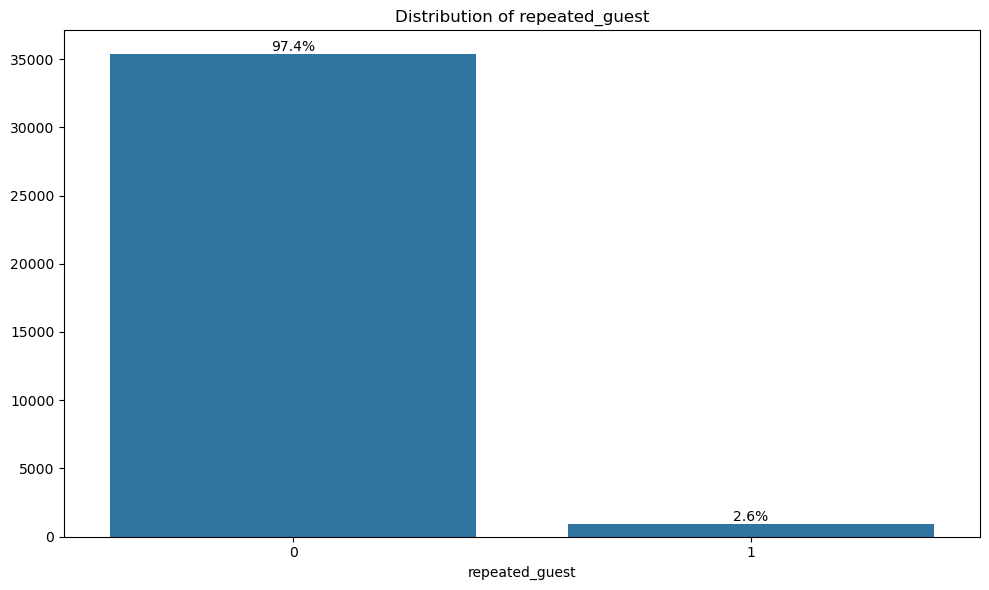


Value Counts and Percentages for repeated_guest:
 Value  Count  Percentage
     0  35345   97.436251
     1    930    2.563749
--------------------------------------------------


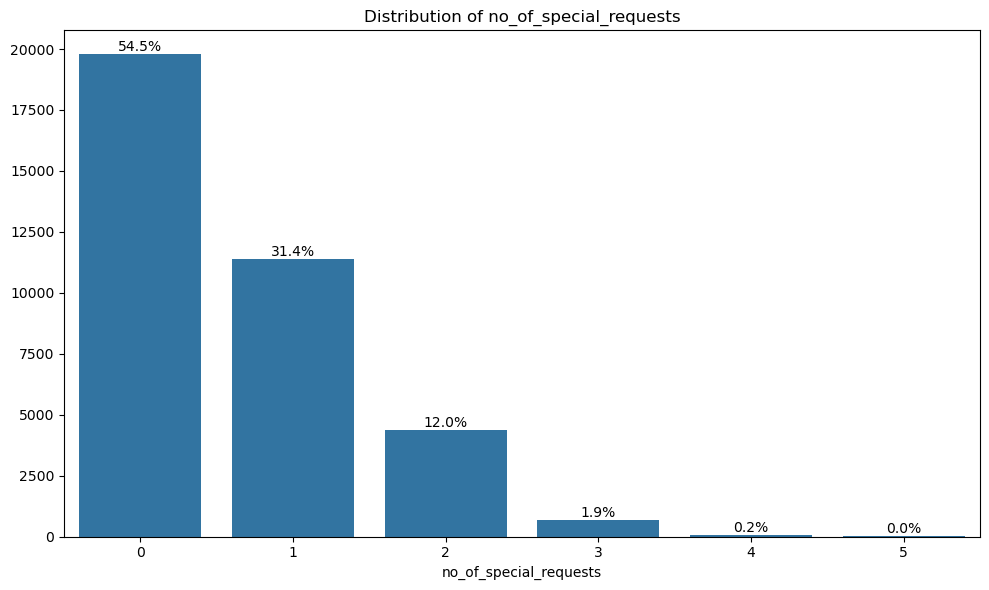


Value Counts and Percentages for no_of_special_requests:
 Value  Count  Percentage
     0  19777   54.519642
     1  11373   31.352171
     2   4364   12.030324
     3    675    1.860786
     4     78    0.215024
     5      8    0.022054
--------------------------------------------------


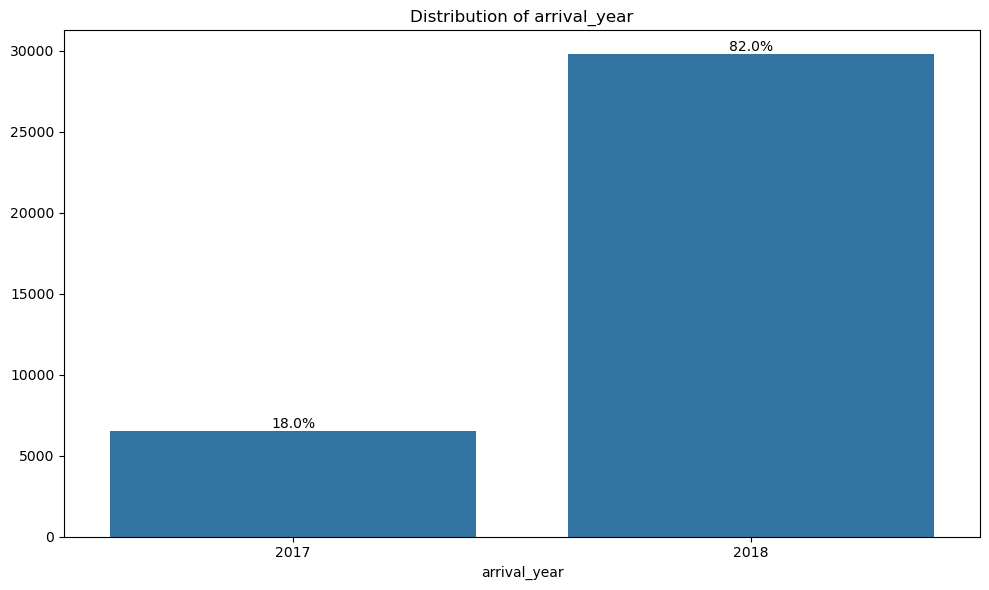


Value Counts and Percentages for arrival_year:
 Value  Count  Percentage
  2017   6514   17.957271
  2018  29761   82.042729
--------------------------------------------------


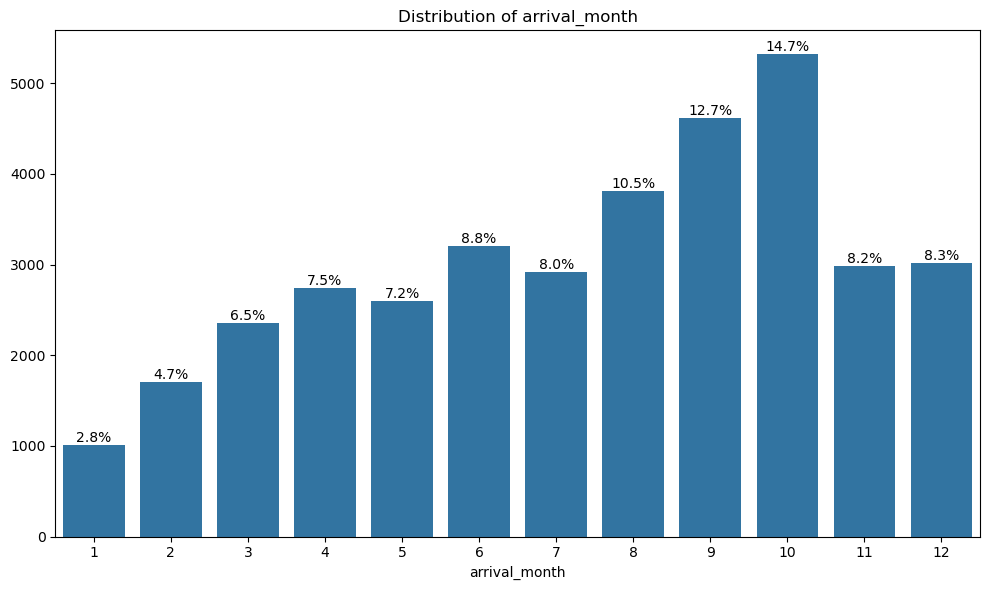


Value Counts and Percentages for arrival_month:
 Value  Count  Percentage
     1   1014    2.795314
     2   1704    4.697450
     3   2358    6.500345
     4   2736    7.542385
     5   2598    7.161957
     6   3203    8.829773
     7   2920    8.049621
     8   3813   10.511371
     9   4611   12.711234
    10   5317   14.657478
    11   2980    8.215024
    12   3021    8.328050
--------------------------------------------------


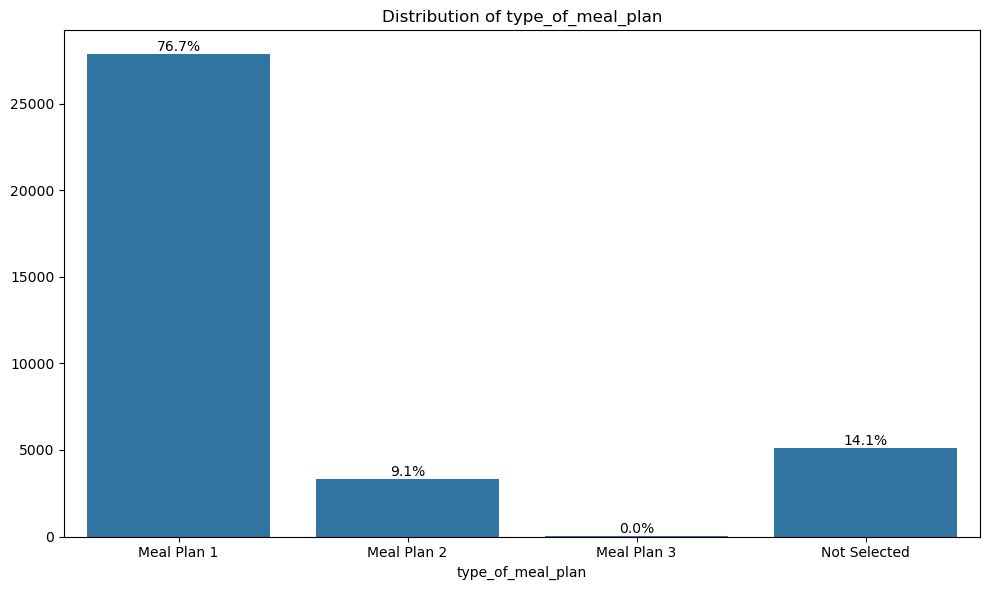


Value Counts and Percentages for type_of_meal_plan:
       Value  Count  Percentage
 Meal Plan 1  27835   76.733287
 Meal Plan 2   3305    9.110958
 Meal Plan 3      5    0.013784
Not Selected   5130   14.141971
--------------------------------------------------


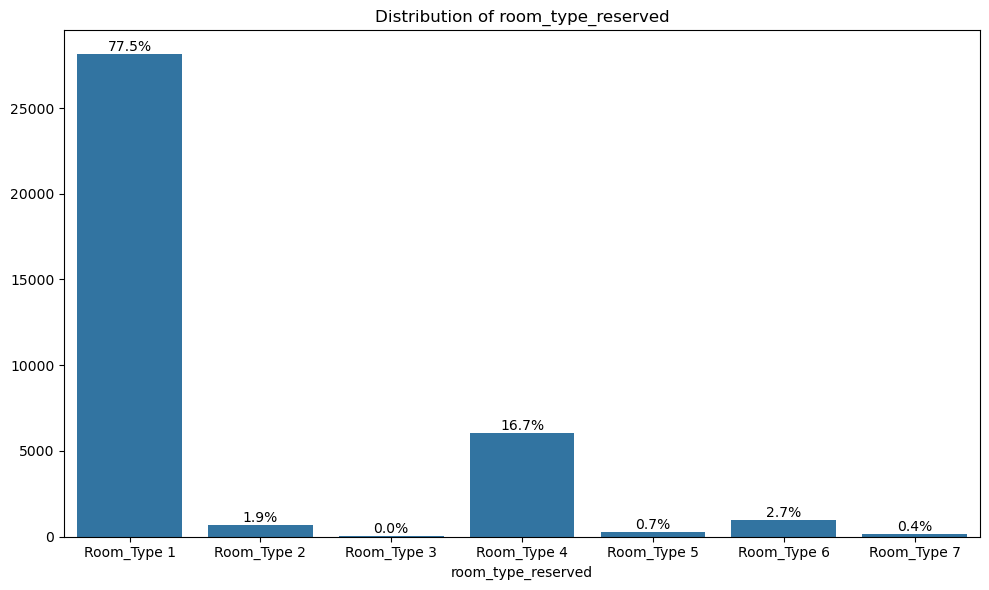


Value Counts and Percentages for room_type_reserved:
      Value  Count  Percentage
Room_Type 1  28130   77.546520
Room_Type 2    692    1.907650
Room_Type 3      7    0.019297
Room_Type 4   6057   16.697450
Room_Type 5    265    0.730531
Room_Type 6    966    2.662991
Room_Type 7    158    0.435562
--------------------------------------------------


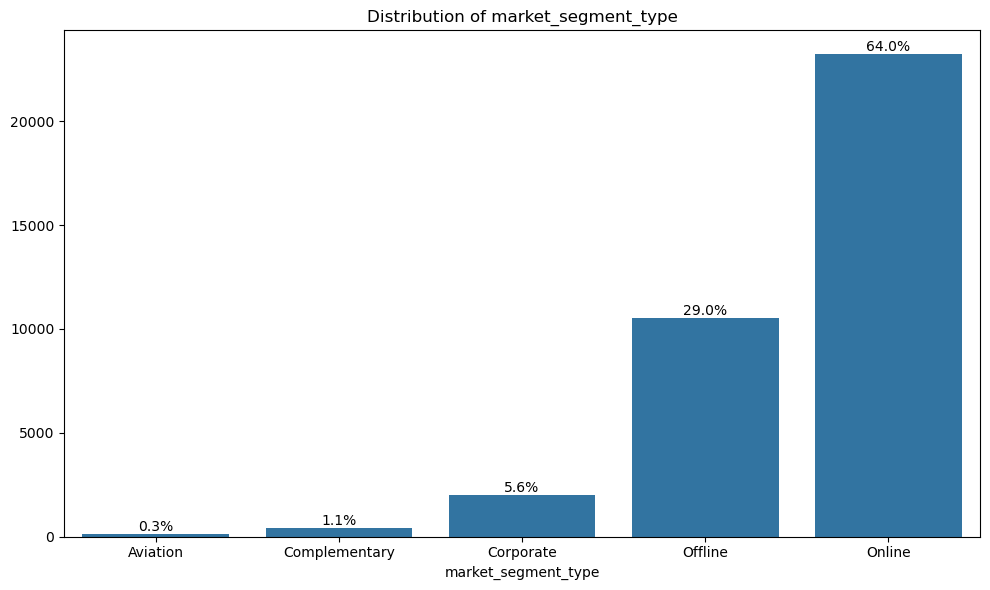


Value Counts and Percentages for market_segment_type:
        Value  Count  Percentage
     Aviation    125    0.344590
Complementary    391    1.077877
    Corporate   2017    5.560303
      Offline  10528   29.022743
       Online  23214   63.994487
--------------------------------------------------


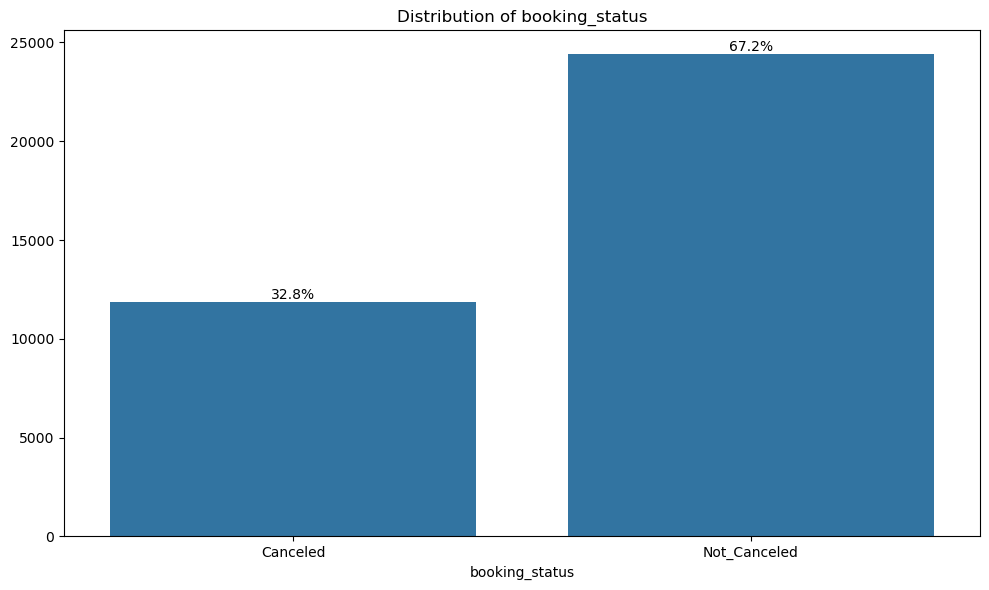


Value Counts and Percentages for booking_status:
       Value  Count  Percentage
    Canceled  11885   32.763611
Not_Canceled  24390   67.236389
--------------------------------------------------


In [34]:
for col in categorical_cols:
        plt.figure(figsize=(10, 6))
        
        # Calculate value counts and percentages
        value_counts = df[col].value_counts().sort_index()
        percentages = df[col].value_counts(normalize=True).sort_index() * 100
        
        # Create bar plot
        sns.barplot(x=value_counts.index, y=value_counts.values)
        plt.title(f'Distribution of {col}')
        plt.xticks()
        
        # Add percentage labels on top of bars
        for i, (count, percentage) in enumerate(zip(value_counts, percentages)):
            plt.text(i, count, f'{percentage:.1f}%', 
                    horizontalalignment='center', verticalalignment='bottom')
        
        plt.tight_layout()
        plt.show()
        
        # Print statistics
        print(f"\nValue Counts and Percentages for {col}:")
        stats_df = pd.DataFrame({
            'Value': value_counts.index,
            'Count': value_counts.values,
            'Percentage': percentages.values
        })
        print(stats_df.to_string(index=False))
        print("-"*50)

- Observations:
   - Around 70% of the bookings are done for 2 adults. Single adult bookings are 21% and group bookings are very few or negligible.
   - Most of the bookings, that is, more than 90% of the bookings have no children. Only less than 10% bookings include children.
   - More than 50% of the bookings are made for weekend nights.
   - Most weekday stays are short, typically lasting between 1 and 3 nights. Extended stays (4 or more nights) are relatively uncommon, and very long stays (10+ nights) are rare, likely representing special cases or unique circumstances. The presence of 0 night stays suggests that there may be non-overnight bookings or special cases in the data.
   - 97% of the guests did not request for car parking space.
   - Repeated guests are almost negligible and most are new or first time customers.
   - More than 50% of the guests did not ask for any special requests only. 30% of the guests only have 1 special request.
   - 80% bookings are made for 2018 and around 20% bookings are made for year 2017.
   - Most of the bookings are made for 9th and 19th month.
   - majority of guests, that is, more than 75% guests selected Meal Plan 1
   - majority of guests, that is, more than 75% guests selected Room type 1 
   - Around 65% of thebookings were made online.
   - 67.2% of the bookings are not cancelled. more than 30% of the bookings are cancelled which is a high number.

#### Multivariate Analysis

 - For multivariate analysis, it’s ideal to focus on variables that could logically influence each other and have a potential impact on the booking_status.

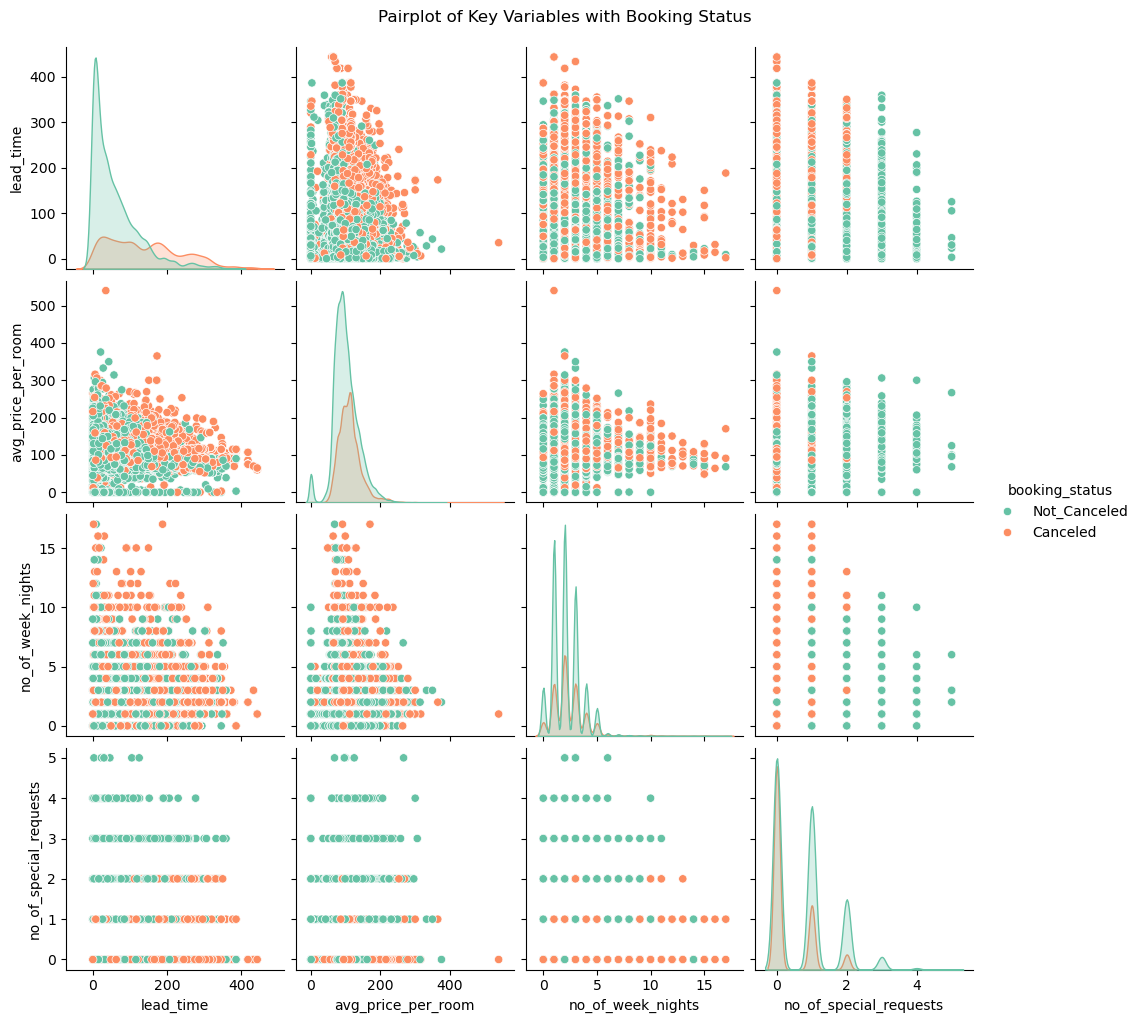

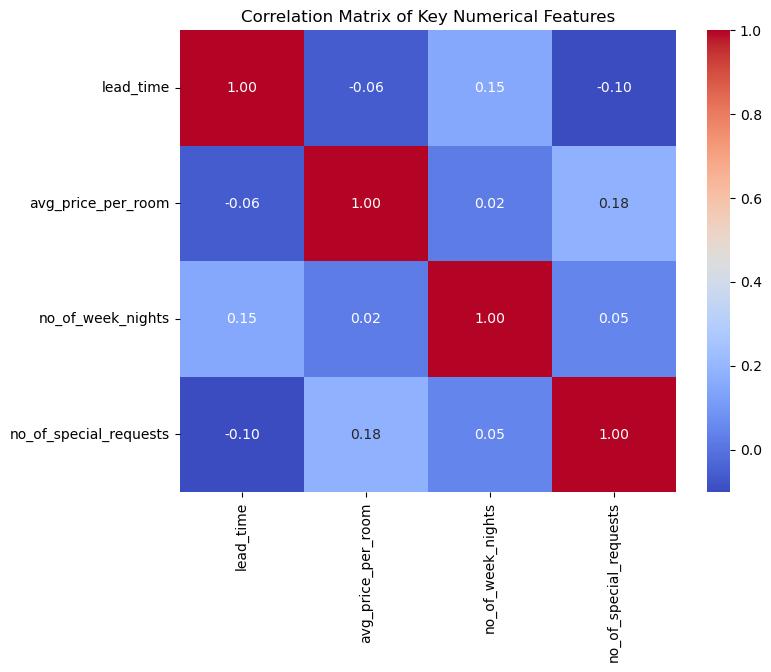

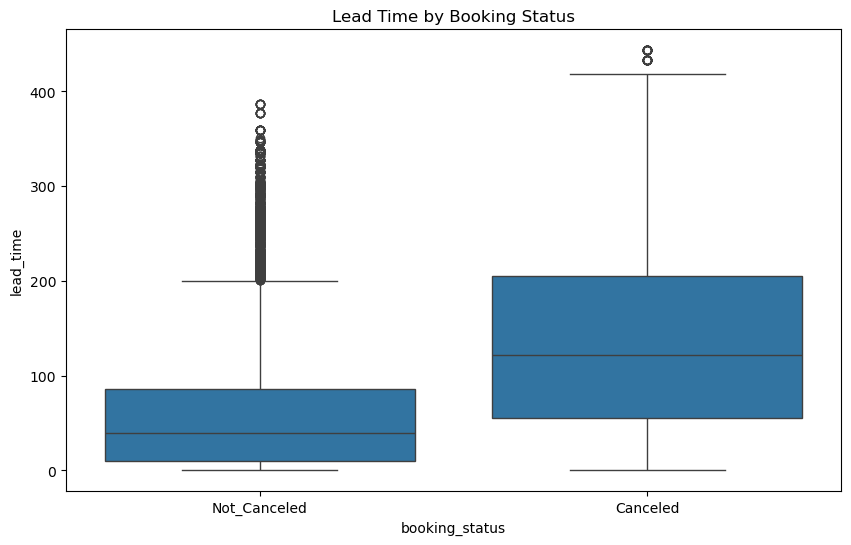

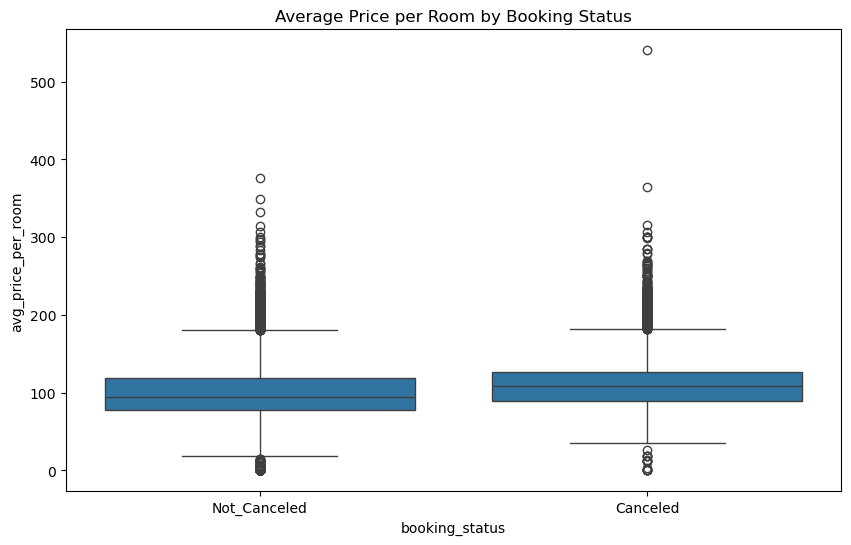

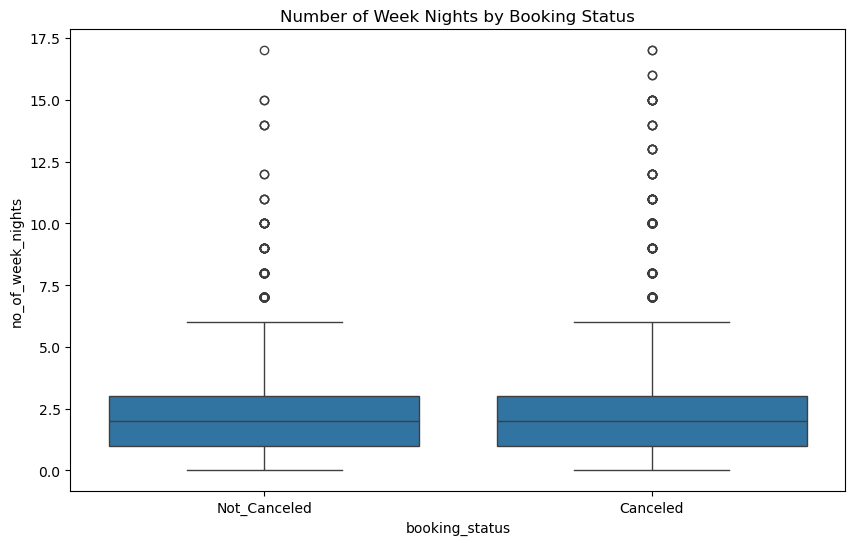

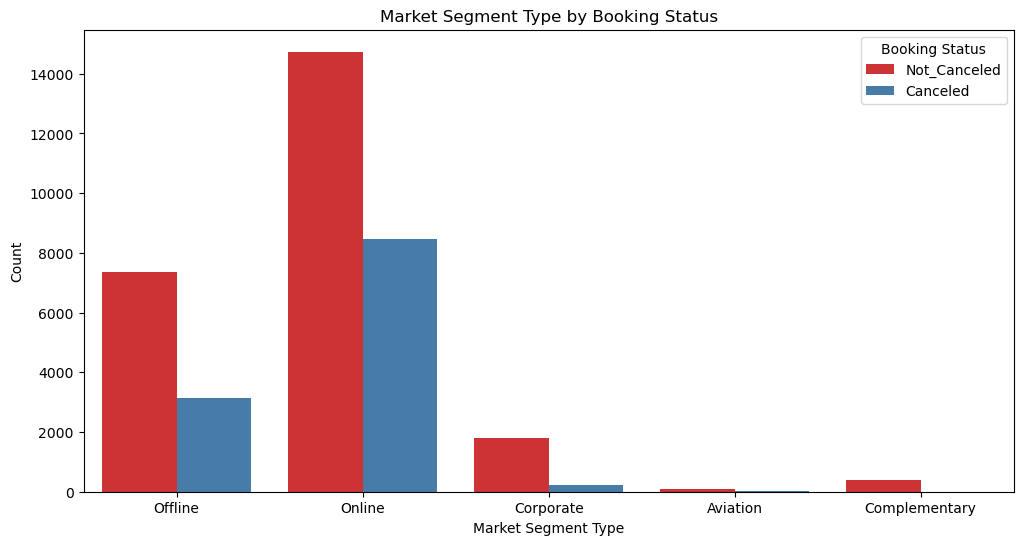

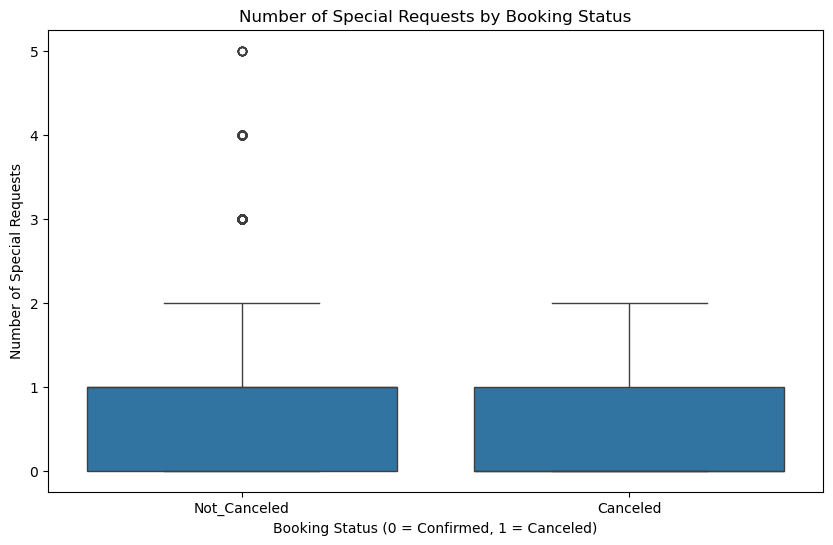

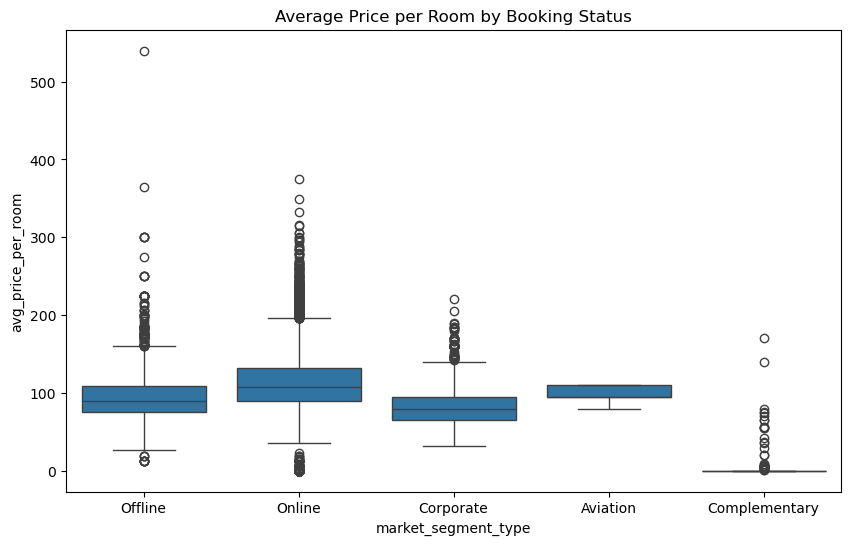

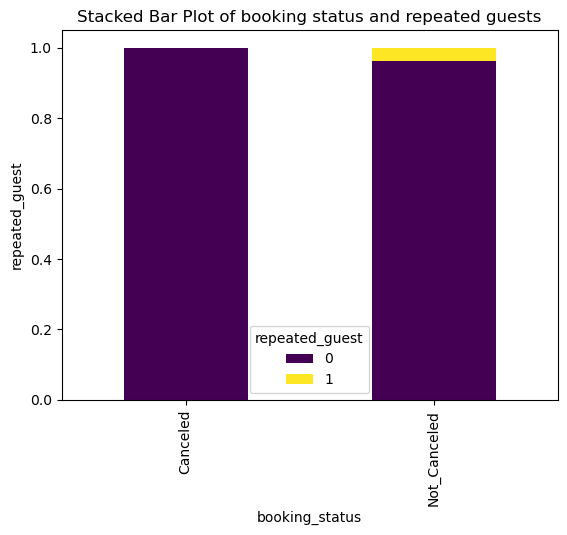

In [36]:
# Selecting key variables for multivariate analysis
selected_vars = ['lead_time', 'avg_price_per_room', 'no_of_week_nights', 
                 'market_segment_type', 'no_of_special_requests', 'booking_status']


# 1. Pairplot for numerical features
sns.pairplot(df[selected_vars], hue='booking_status', diag_kind='kde', palette="Set2")
plt.suptitle("Pairplot of Key Variables with Booking Status", y=1.02)
plt.show()

# 2. Heatmap of Correlation (for numerical features only)
numeric_vars = ['lead_time', 'avg_price_per_room', 'no_of_week_nights', 'no_of_special_requests']
corr_matrix = df[numeric_vars].corr()
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Matrix of Key Numerical Features")
plt.show()

# 3. Boxplots to observe interaction of continuous variables with booking_status
plt.figure(figsize=(10, 6))
sns.boxplot(x='booking_status', y='lead_time', data=df)
plt.title("Lead Time by Booking Status")
plt.show()

plt.figure(figsize=(10, 6))
sns.boxplot(x='booking_status', y='avg_price_per_room', data=df)
plt.title("Average Price per Room by Booking Status")
plt.show()

plt.figure(figsize=(10, 6))
sns.boxplot(x='booking_status', y='no_of_week_nights', data=df)
plt.title("Number of Week Nights by Booking Status")
plt.show()

# 4. Categorical plots to observe interaction of categorical variable with booking_status
plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='market_segment_type', hue='booking_status', palette="Set1")
plt.title("Market Segment Type by Booking Status")
plt.xlabel("Market Segment Type")
plt.ylabel("Count")
plt.legend(title="Booking Status")
plt.show()

# Boxplot for no_of_special_requests vs booking_status
plt.figure(figsize=(10, 6))
sns.boxplot(x='booking_status', y='no_of_special_requests', data=df)
plt.title("Number of Special Requests by Booking Status")
plt.xlabel("Booking Status (0 = Confirmed, 1 = Canceled)")
plt.ylabel("Number of Special Requests")
plt.show()

# Box plot for avg price per room vs different market segments
plt.figure(figsize=(10, 6))
sns.boxplot(x='market_segment_type', y='avg_price_per_room', data=df)
plt.title("Average Price per Room by Booking Status")
plt.show()

contingency_table = pd.crosstab(df['booking_status'], df['repeated_guest'], normalize='index')
contingency_table.plot(kind='bar', stacked=True, colormap="viridis")
plt.title("Stacked Bar Plot of booking status and repeated guests")
plt.xlabel("booking_status")
plt.ylabel("repeated_guest")
plt.show()

- Observations:
    -  It can be observed that the bookings of higher average room price and higher lead time received more cancellations.
    -  The no.of week nights does not help us understand or predict the booking status.
    -  Most bookings are done online and also the cancellations are very high in online bookings compared to other segments.
    -  Bookings with special requests more than 2 are more likely to be cancelled. 

In [38]:
pd.crosstab(df['booking_status'], df['repeated_guest'], margins=True)


repeated_guest,0,1,All
booking_status,,,
Canceled,11869,16,11885
Not_Canceled,23476,914,24390
All,35345,930,36275


Answers to EDA Questions

What are the busiest months in the hotel?
- September and October are the most busiest months. The arrivals increase from July month and peaks in October.

Which market segment do most of the guests come from?

- Most guests come from Online Market segments

Hotel rates are dynamic and change according to demand and customer demographics. What are the differences in room prices in different market segments?
- It is evident that the demand for hotel rooms is more in online market as most bookings are made online. So, the average price per room and the fluctiuations are more in online bookings as compared to other markets.
- After online market, the offline and corporate bookings are more and so the average price per room is more in these two markets after online market.
- Booking made from aviation market are less, so there are no fluctuations in the average price per room and they always have a standard price.
- And it is observed the complimentary rooms are offered at a minimal price .

What percentage of bookings are canceled?
- It is observed that 32.8% of the bookings are cancelled.

Repeating guests are the guests who stay in the hotel often and are important to brand equity. What percentage of repeating guests cancel?

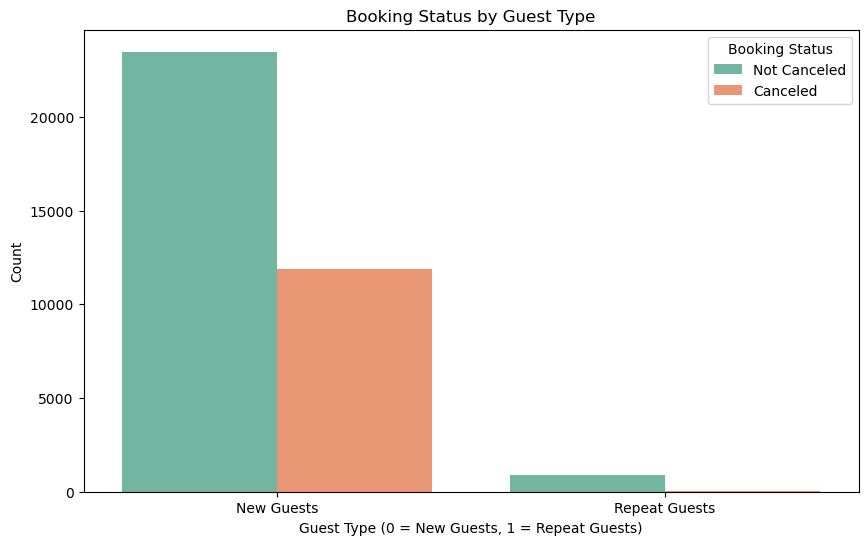

In [120]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='repeated_guest', hue='booking_status', palette="Set2")

# Customize the plot
plt.title("Booking Status by Guest Type")
plt.xlabel("Guest Type (0 = New Guests, 1 = Repeat Guests)")
plt.ylabel("Count")
plt.legend(title="Booking Status", labels=["Not Canceled", "Canceled"])
plt.xticks(ticks=[0, 1], labels=["New Guests", "Repeat Guests"])

plt.show()

- It is observed that very few repeated guests cancel the booking. Out 930 repeated guests only 16 have cancelled that is only 1.7% of repeated customers have cancelled.

Many guests have special requirements when booking a hotel room. Do these requirements affect booking cancellation?
- Yes, it is observed that bookings with special requests more than 2 are more likely to be cancelled. 

# Data Preprocessing

- Missing Value Treatment

In [40]:
#first let us check if there are any missing values:
df.isnull().sum()


no_of_adults                            0
no_of_children                          0
no_of_weekend_nights                    0
no_of_week_nights                       0
type_of_meal_plan                       0
required_car_parking_space              0
room_type_reserved                      0
lead_time                               0
arrival_year                            0
arrival_month                           0
arrival_date                            0
market_segment_type                     0
repeated_guest                          0
no_of_previous_cancellations            0
no_of_previous_bookings_not_canceled    0
avg_price_per_room                      0
no_of_special_requests                  0
booking_status                          0
dtype: int64

Observations:
 - There are no misisng values.

### Outlier Detection and Treatment

- Based on the above analysis and also the value_counts() result above, we are performing the following steps:

In [59]:
df[df['no_of_adults']==0 ]

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
32,0,2,0,3,Meal Plan 1,0,Room_Type 2,56,2018,12,7,Online,0,0,0,82.44,1,Not_Canceled
287,0,2,2,2,Meal Plan 1,0,Room_Type 1,68,2018,4,24,Online,0,0,0,108.38,1,Canceled
653,0,2,1,2,Meal Plan 1,0,Room_Type 2,78,2018,8,19,Online,0,0,0,115.68,1,Not_Canceled
937,0,2,0,3,Meal Plan 1,0,Room_Type 2,40,2018,1,14,Online,0,0,0,6.67,1,Not_Canceled
954,0,2,1,1,Meal Plan 1,0,Room_Type 2,92,2018,10,29,Online,0,0,0,81.50,2,Not_Canceled
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34720,0,2,0,3,Meal Plan 1,0,Room_Type 2,76,2018,9,21,Online,0,0,0,127.38,3,Not_Canceled
34730,0,2,1,1,Meal Plan 1,0,Room_Type 2,178,2018,8,27,Online,0,0,0,88.77,0,Canceled
34890,0,2,2,2,Meal Plan 1,0,Room_Type 2,31,2018,9,16,Online,0,0,0,124.25,2,Not_Canceled
35691,0,2,2,1,Meal Plan 1,0,Room_Type 2,75,2018,3,19,Online,0,0,0,78.00,0,Canceled


In [57]:
df[(df['no_of_children']==9) | (df['no_of_children']==10) ]

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
6338,2,10,0,2,Meal Plan 1,0,Room_Type 4,37,2018,1,12,Online,0,0,0,84.45,1,Not_Canceled
10041,1,9,2,1,Meal Plan 1,0,Room_Type 1,11,2017,10,11,Corporate,0,0,0,95.00,0,Not_Canceled
10061,2,9,2,5,Meal Plan 1,0,Room_Type 2,8,2017,8,13,Online,0,0,0,76.50,1,Canceled


type_of_meal_plan:
- The majority have selected Meal Plan 1, with a few using Meal Plan 2 or 3.
- No need for outlier treatment here, as meal plans are a categorical variable and outliers aren’t relevant. Since outliers are typically extreme or unusual values in continuous data, but categorical data represents distinct groups or classes. In categorical variables, outliers can sometimes exist as rare categories (e.g., a category that occurs only once or a few times), but they don’t typically have the same impact on statistical measures or predictions as numeric outliers do.

room_type_reserved:
- Most bookings are for Room_Type 1 and Room_Type 4, with rare occurrences of other room types.
- No outlier handling is needed for this categorical variable.
  
arrival_year:
- Only contains years 2017 and 2018, which likely don't require outlier handling.

arrival_month and arrival_date:
- Standard calendar months (1–12) and days (1–31) are represented.
- No outliers here.
  
market_segment_type:
- Mostly online and offline, with a few cases in corporate, complementary, and aviation segments.
- No need to treat outliers for this categorical variable.

repeated_guest:
- Binary values (0 for new guests, 1 for repeat guests).
- No outliers
  
no_of_previous_cancellations and no_of_previous_bookings_not_canceled:
- Most bookings have no prior cancellations or non-cancelled bookings, with a few exceptions.
- No outlier treatment needed here.

no_of_special_requests:
- Most requests fall between 0 and 3, with a few having 4 or 5 special requests.
- No outlier treatment required here.

avg_price_per_room:
- Prices have a broad range, with some high values that may represent premium room bookings.

lead_time:
- lead_time varies significantly with a broad range of values, which is expected as lead times naturally vary. Higher or very low lead times may indicate that the guests have booked it many months prior or few days before the arrival.

## Feature Engineering

### First we will start by creating new features by combining the existing features

In [66]:
df['no_of_guests'] = df['no_of_adults']+df['no_of_children']

Reason:
- Total party size might affect booking behavior and could help understand if larger parties tend to cancel more frequently.

In [71]:
# drop adults and children column since we now combined these 2:
df.drop(['no_of_adults','no_of_children'],axis = 1, inplace = True)

In [75]:
df.sample(5)

,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status,no_of_guests
29785,0,2,Meal Plan 1,0,Room_Type 1,117,2018,4,29,Online,0,0,0,72.67,0,Canceled,2
26579,0,1,Not Selected,0,Room_Type 1,6,2018,3,4,Online,0,0,0,100.00,0,Not_Canceled,2
31808,0,2,Not Selected,0,Room_Type 1,53,2018,5,31,Online,0,0,0,116.10,0,Canceled,2
26509,0,2,Meal Plan 1,0,Room_Type 1,12,2017,12,16,Offline,0,0,0,58.00,0,Not_Canceled,2
10017,0,4,Meal Plan 1,0,Room_Type 5,120,2018,4,5,Online,0,0,0,94.86,0,Canceled,2


### Separating dependent and independent variables

In [195]:
y = df['booking_status']
y

0        Not_Canceled
1        Not_Canceled
2            Canceled
3            Canceled
4            Canceled
             ...     
36270    Not_Canceled
36271        Canceled
36272    Not_Canceled
36273        Canceled
36274    Not_Canceled
Name: booking_status, Length: 36275, dtype: object

In [145]:
type(y)

pandas.core.series.Series

In [181]:
x = df.drop(['booking_status'],axis = 1)

In [183]:
x.head()

,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,no_of_guests
0,1,2,Meal Plan 1,0,Room_Type 1,224,2017,10,2,Offline,0,0,0,65.00,0,2
1,2,3,Not Selected,0,Room_Type 1,5,2018,11,6,Online,0,0,0,106.68,1,2
2,2,1,Meal Plan 1,0,Room_Type 1,1,2018,2,28,Online,0,0,0,60.00,0,1
3,0,2,Meal Plan 1,0,Room_Type 1,211,2018,5,20,Online,0,0,0,100.00,0,2
4,1,1,Not Selected,0,Room_Type 1,48,2018,4,11,Online,0,0,0,94.50,0,2


### One hot Encoding

In [185]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

In [187]:
ct = ColumnTransformer(
    transformers= [('encoder',OneHotEncoder(),['type_of_meal_plan','room_type_reserved','market_segment_type'])],remainder = 'passthrough'
)
x = ct.fit_transform(x)
    

In [189]:
x

array([[  1.  ,   0.  ,   0.  , ...,  65.  ,   0.  ,   2.  ],
       [  0.  ,   0.  ,   0.  , ..., 106.68,   1.  ,   2.  ],
       [  1.  ,   0.  ,   0.  , ...,  60.  ,   0.  ,   1.  ],
       ...,
       [  1.  ,   0.  ,   0.  , ...,  98.39,   2.  ,   2.  ],
       [  0.  ,   0.  ,   0.  , ...,  94.5 ,   0.  ,   2.  ],
       [  1.  ,   0.  ,   0.  , ..., 161.67,   0.  ,   2.  ]])

In [191]:
x[0]

array([1.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 1.000e+00, 0.000e+00,
       0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
       0.000e+00, 0.000e+00, 1.000e+00, 0.000e+00, 1.000e+00, 2.000e+00,
       0.000e+00, 2.240e+02, 2.017e+03, 1.000e+01, 2.000e+00, 0.000e+00,
       0.000e+00, 0.000e+00, 6.500e+01, 0.000e+00, 2.000e+00])

In [197]:
#converting y also into a numpy array
y = y.values

## Label Encoding the dependent variable

In [200]:
from sklearn.preprocessing import LabelEncoder
label = LabelEncoder()
y = label.fit_transform(y)
y = 1-y

In [202]:
y

array([0, 0, 1, ..., 0, 1, 0])

### Our primary goal is to predict whether a booking is cancelled, so that is the reason I want my cancelled to be labelled as 1 and not cancelled to be labelled as 0.

## Train test Split

In [205]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2,random_state = 42)

## Feature Scaling

Our dataset contains features with large differences in ranges (for example, lead_time ranges from 0 to 353, while no_of_special_requests ranges from 0 to 5), scaling can help avoid situations where larger values dominate the model's learning.

- other than the variables to which I have applied One Hot Encoding, I will apply feature scaling to all other varibales.

In [207]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train[:,16:] = sc.fit_transform(x_train[:,16:])
x_test[:,16:] = sc.transform(x_test[:,16:])

## Model Building

In [230]:
# importing required libraries
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report

In [211]:
models = {
    'Logistic Regression': LogisticRegression(),
    'KNN Classifier': KNeighborsClassifier(),
    'Naive Bayes': GaussianNB(),
    'SVM Classifier': SVC()
}

# Evaluate models
for model_name, model in models.items():
    # Train model
    model.fit(x_train, y_train)
    
    # Make predictions
    y_pred = model.predict(x_test)
    
    # Calculate accuracy
    accuracy = accuracy_score(y_test, y_pred)
    
    # Print classification report
    print(f"{model_name} Performance:")
    print(f"Accuracy: {accuracy:.4f}")
    print(classification_report(y_test, y_pred))
    print("-" * 50)

Logistic Regression Performance:
Accuracy: 0.8065
              precision    recall  f1-score   support

           0       0.83      0.89      0.86      4839
           1       0.75      0.63      0.68      2416

    accuracy                           0.81      7255
   macro avg       0.79      0.76      0.77      7255
weighted avg       0.80      0.81      0.80      7255

--------------------------------------------------
KNN Classifier Performance:
Accuracy: 0.8558
              precision    recall  f1-score   support

           0       0.88      0.91      0.89      4839
           1       0.80      0.75      0.78      2416

    accuracy                           0.86      7255
   macro avg       0.84      0.83      0.83      7255
weighted avg       0.85      0.86      0.85      7255

--------------------------------------------------
Naive Bayes Performance:
Accuracy: 0.4085
              precision    recall  f1-score   support

           0       0.88      0.13      0.23      483

Here, for us both the classes are important (Not cancelled and Cancelled). So the metric which will be important to us here is recall, precison, F1-score and Weighted avg because:
- Recall for class 1 tells us the proportion of actual "Cancelled" bookings that were correctly identified by the model as "Cancelled."
- Weighted Average: This is the average of the precision, recall, and F1-score across all classes, weighted by the number of samples in each class.
- This is more useful when you want to account for the imbalance between classes and give more importance to the larger class. Since here we have class imbalance in our case we use tis weighted avg metric.

#### So, according to the above report, KNN performed well as compared to other models with a weighted average 0.85 F1-score

## Model Performance Improvement

In this section, we will:
- Tune hyperparameters for the models using GridSearchCV.
- Try at least 5 combinations of parameters for each model.
- Evaluate the performance of the tuned models.

In [218]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, classification_report

# Define hyperparameter grids for tuning
param_grids = {
    'Logistic Regression': {
        'C': [0.1, 1, 10],
        'solver': ['liblinear', 'lbfgs']
    },
    'KNN Classifier': {
        'n_neighbors': [3, 5, 7, 9],
        'weights': ['uniform', 'distance'],
        'metric': ['euclidean', 'manhattan']
    },
    'SVM Classifier': {
        'C': [0.1, 1, 10],
        'kernel': ['linear', 'rbf'],
        'gamma': ['scale', 'auto']
    }
}

# Define models again (without tuning, just to pass into GridSearchCV)
models = {
    'Logistic Regression': LogisticRegression(),
    'KNN Classifier': KNeighborsClassifier(),
    'SVM Classifier': SVC()
}

# Loop through each model and hyperparameter grid
for model_name, model in models.items():
    print(f"Tuning {model_name}...")
    
    # Perform GridSearchCV for hyperparameter tuning
    grid_search = GridSearchCV(model, param_grids[model_name], cv=5, scoring='accuracy', n_jobs=-1)
    grid_search.fit(x_train, y_train)
    
    # Get the best model and parameters
    best_model = grid_search.best_estimator_
    best_params = grid_search.best_params_
    
    # Make predictions with the best model
    y_pred = best_model.predict(x_test)
    
    # Evaluate the tuned model
    accuracy = accuracy_score(y_test, y_pred)
    
    print(f"Best Parameters for {model_name}: {best_params}")
    print(f"Accuracy: {accuracy:.4f}")
    print(classification_report(y_test, y_pred))
    print("-" * 50)


Tuning Logistic Regression...
Best Parameters for Logistic Regression: {'C': 0.1, 'solver': 'lbfgs'}
Accuracy: 0.8057
              precision    recall  f1-score   support

           0       0.83      0.89      0.86      4839
           1       0.75      0.63      0.68      2416

    accuracy                           0.81      7255
   macro avg       0.79      0.76      0.77      7255
weighted avg       0.80      0.81      0.80      7255

--------------------------------------------------
Tuning KNN Classifier...
Best Parameters for KNN Classifier: {'metric': 'manhattan', 'n_neighbors': 9, 'weights': 'distance'}
Accuracy: 0.8837
              precision    recall  f1-score   support

           0       0.90      0.93      0.91      4839
           1       0.85      0.80      0.82      2416

    accuracy                           0.88      7255
   macro avg       0.87      0.86      0.87      7255
weighted avg       0.88      0.88      0.88      7255

----------------------------------

Observation:
- It can be observed that the performance improved for KNN and SVM. The best performing model is again KNN with an accuracy of 0.88 and weighted avg for fl1-score is 0.88.
- Also, the precision, recall, f1-score, accuracy all metrics are higher in KNN comapred to other models.

### Actionable Insights
Model Performance Comparison:
- Logistic Regression achieved an accuracy of 80.57% with a precision of 0.83 and a recall of 0.63 for the "Cancelled" class. While its performance is decent, it struggles with recall, which indicates that it misses many cancellations (false negatives).
 - KNN Classifier performed the best with an accuracy of 88.37%. It also delivered a precision of 0.85 and a recall of 0.80 for the "Canceled" class, indicating that it is good at both identifying cancellations and minimizing false positives.
 - SVM Classifier performed well with an accuracy of 86.18%, but its recall for the "Canceled" class (0.73) is slightly lower than KNN, suggesting that it misses fewer cancellations than Logistic Regression but not as effectively as KNN.
Model Strengths:

- KNN Classifier has the highest precision and recall for the "Canceled" class, making it the most well-rounded model, especially for the task of detecting cancellations. Its precision and recall for the minority class are both higher than Logistic Regression and SVM.
- SVM Classifier also provides robust performance, particularly in precision for both classes, but it slightly lags behind KNN in terms of recall.
- Logistic Regression is the weakest performer, particularly in terms of recall for the "Canceled" class, which may be problematic if detecting cancellations is a high-priority objective.
Precision vs. Recall Trade-Off:

- While KNN offers the best balance of precision and recall for the "Canceled" class, the recall from Logistic Regression is noticeably lower, which means it misses a significant number of cancellations. This is an issue if the goal is to minimize the number of missed cancellations.
SVM has a solid precision for the "Canceled" class but still lacks behind KNN in recall.
Imbalanced Class Impact:

 - The "Canceled" class is underrepresented compared to "Not_Canceled," so performance metrics like recall, F1-score and weighted avg become more critical in evaluating how well the model identifies minority class instances. KNN's better recall indicates it is more sensitive to identifying cancellations.

## Business Recommendations
1.   Prioritize KNN for Predicting Cancellations: Given that KNN Classifier provides the best combination of precision and recall, it should be the preferred model for predicting cancellations. This model will reduce both false positives and false negatives, thus improving the accuracy of cancellation predictions and allowing for better resource management.

2.  Leverage Predictive Insights for Improved Customer Service:
- The ability to predict cancellations can help improve customer retention strategies. By predicting cancellations in advance, businesses can take proactive steps, such as reaching out to customers to offer incentives, discounts, or assistance before a cancellation occurs.
- Implementing a system where at-risk bookings (predicted to cancel) are flagged could help customer support teams engage with those customers and offer solutions tailored to their needs.


3. Utilize the Insights for Operational Efficiency:
- By identifying likely cancellations early, businesses can adjust their operations accordingly. This could include redistributing resources, adjusting staffing levels, or even adjusting marketing campaigns to attract more bookings.
- Logistic Regression might still have utility in simpler use cases or where interpretability and speed are important, but for cases where predictive accuracy is paramount, KNN should be prioritized.

4. Adjust Marketing and Revenue Strategies Based on Cancellations:
- Cancellations directly affect revenue, so understanding when and why customers are likely to cancel can inform business decisions. For instance, businesses can focus on improving the booking process, providing better offers for customers who show signs of cancellation, or offering time-sensitive discounts.
- With accurate predictions from the models, marketing teams can optimize their targeting to attract customers who are less likely to cancel, thus improving the overall efficiency of marketing campaigns.